In [107]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.svm import SVC
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

sns.set(style="whitegrid", color_codes=True)

In [3]:
## Data description

# age (age in years)
# sex (1 = male, 0 = female)
# trestbps (resting blood pressure)
# chol (serum cholesteral in mg/dl)
# fbs (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false)
# restecg (resting electrocardiographic results)
# thalach (maximum heart rate achived)
# exang (exercised induced angina) (1 = yes, 0 = no)
# oldpeak (ST depression induced by exercise relative to rest)
# slope (the slope of the peak exercise ST segment)
# ca (number of major vessels (0-3) colored by flourosopy)
# thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target (what we want to predict: patient has heart disease) (1 = true, 0 = false)

In [108]:
## Read dataset
csv = 'heart.csv'
ds = pd.read_csv(csv)

# Columns rename
ds.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [5]:
## Data exploration

ds.info()
ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


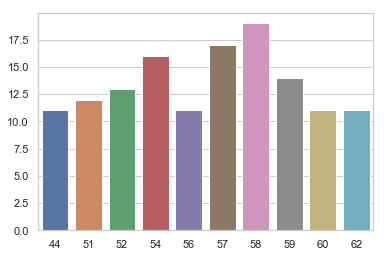

In [6]:
sns.barplot(x=ds.age.value_counts()[:10].index, y=ds.age.value_counts()[:10].values)

C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


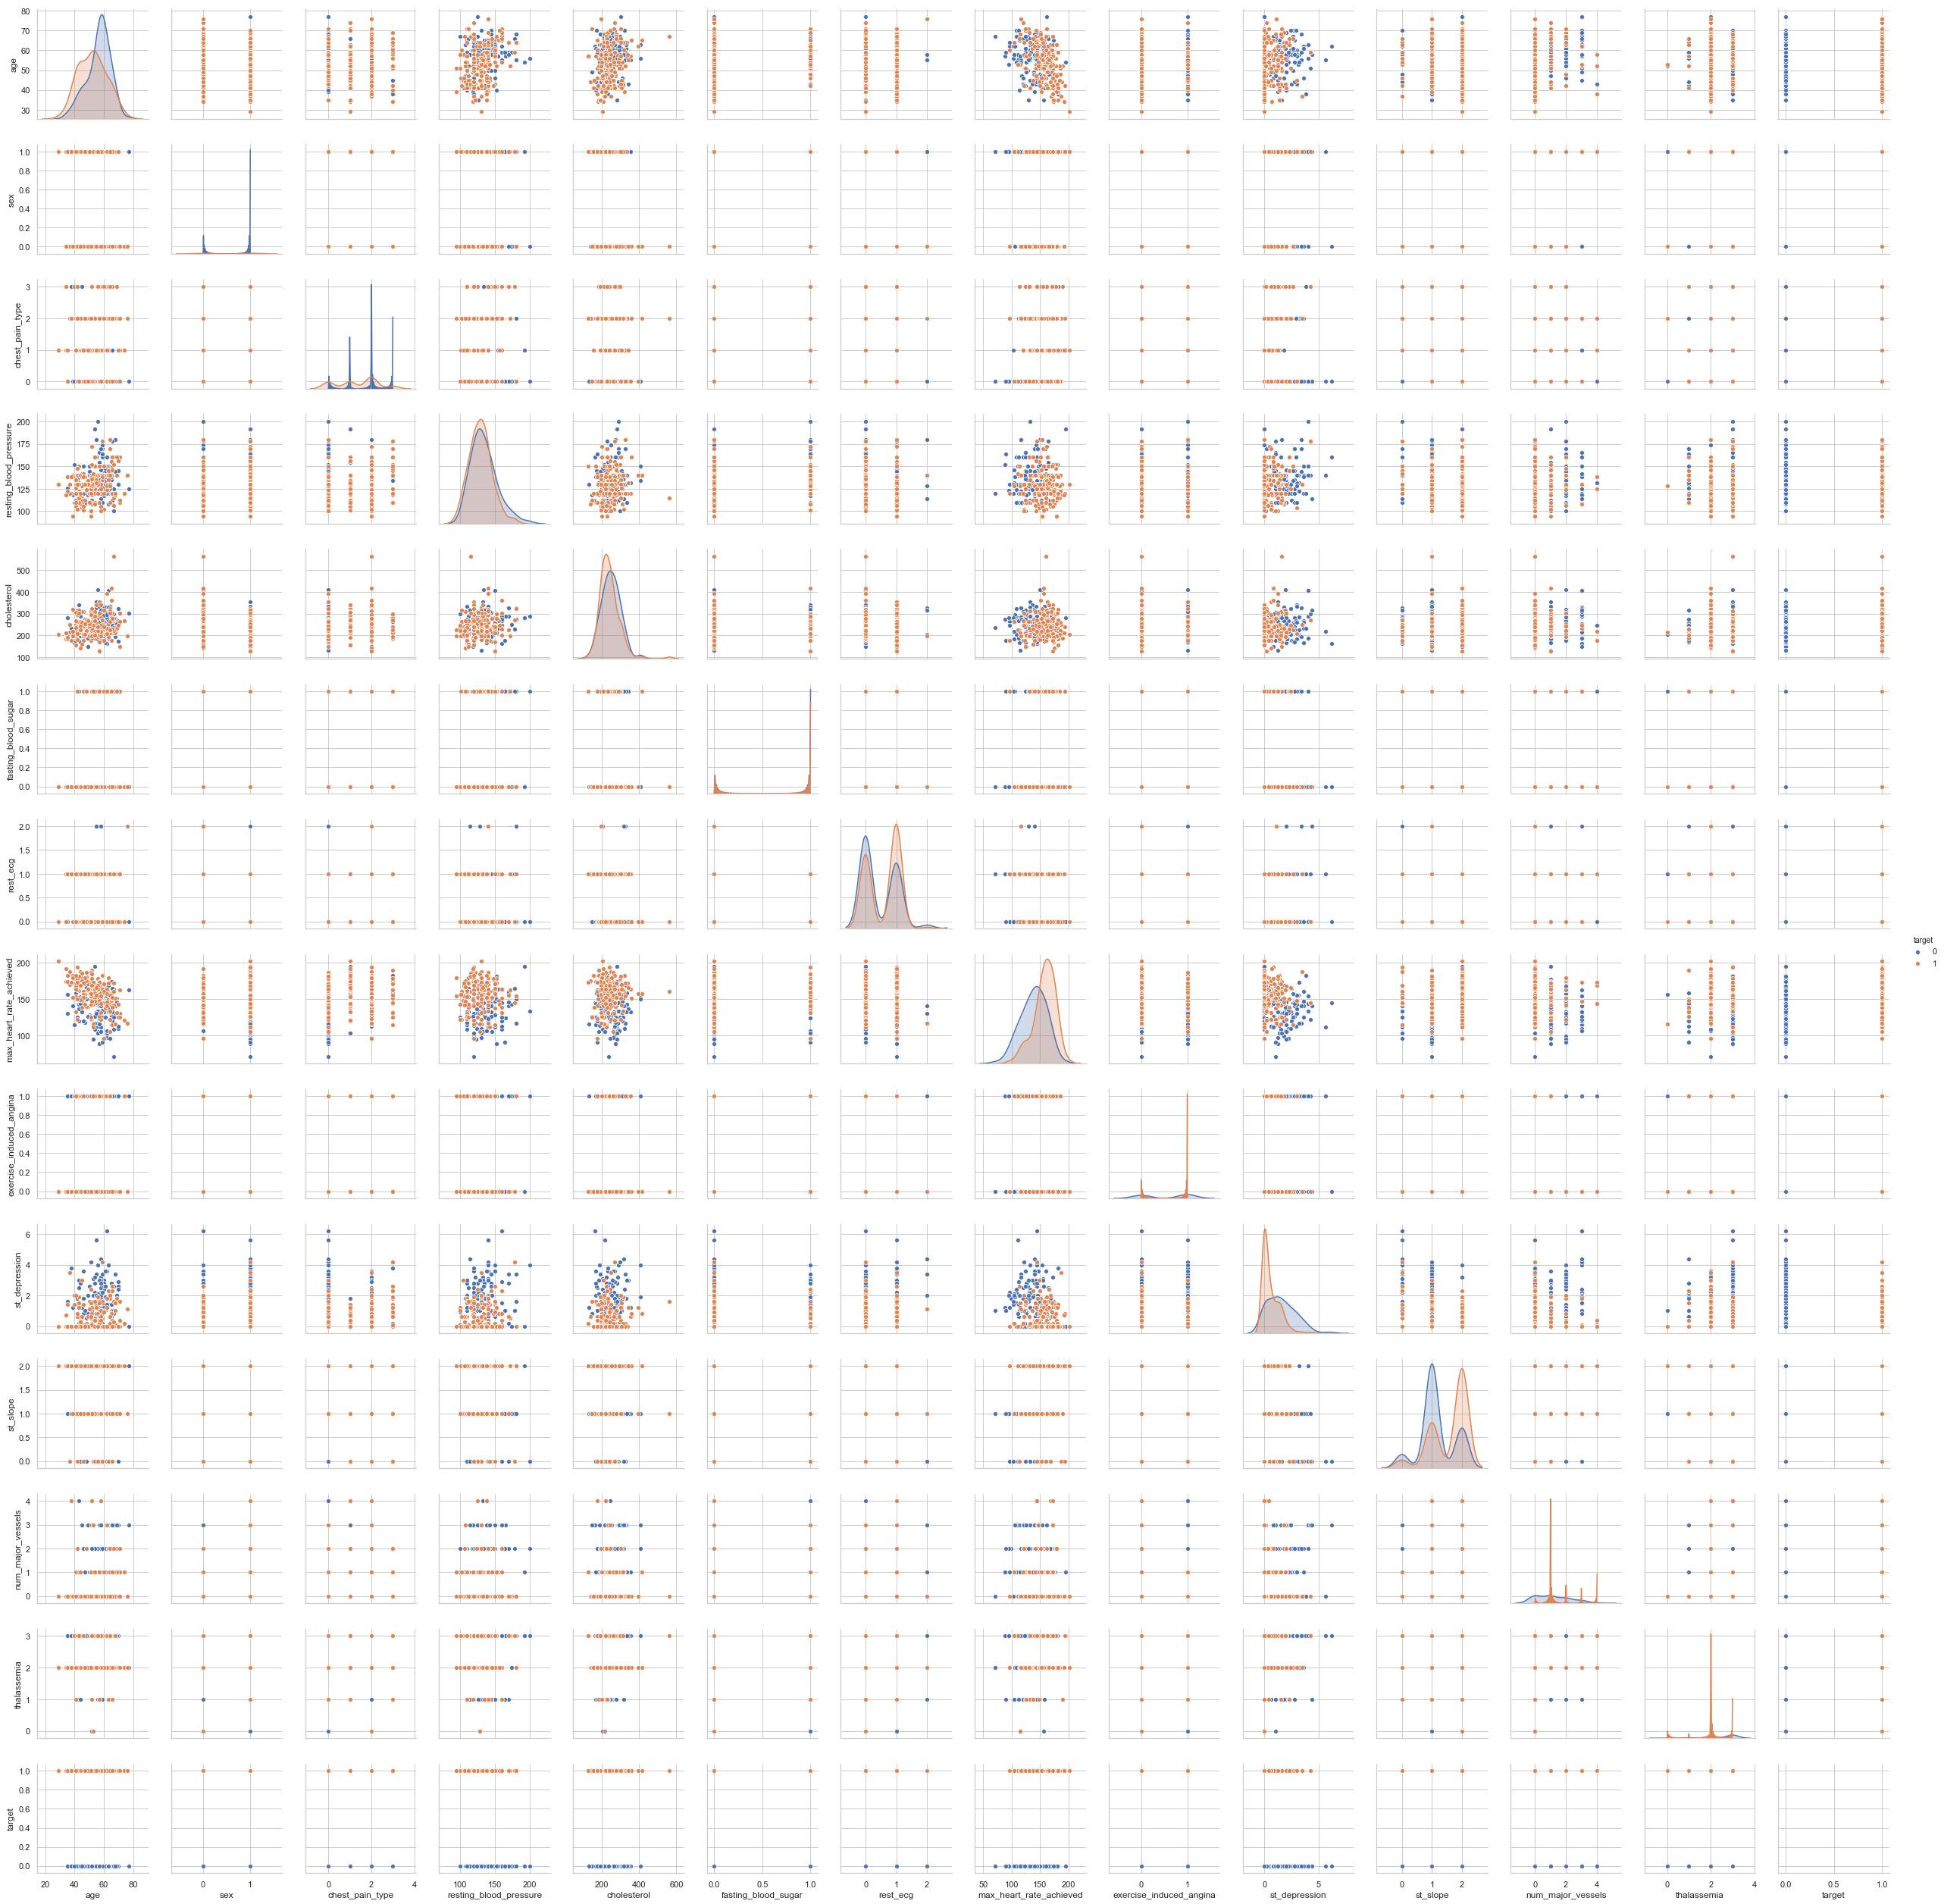

In [7]:
sns.pairplot(data=ds, hue='target')

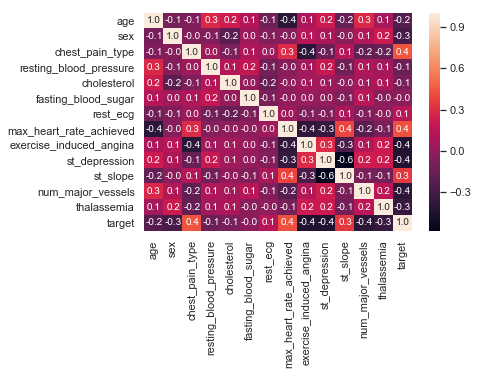

In [8]:
sns.heatmap(ds.corr(), annot=True, fmt='.1f')

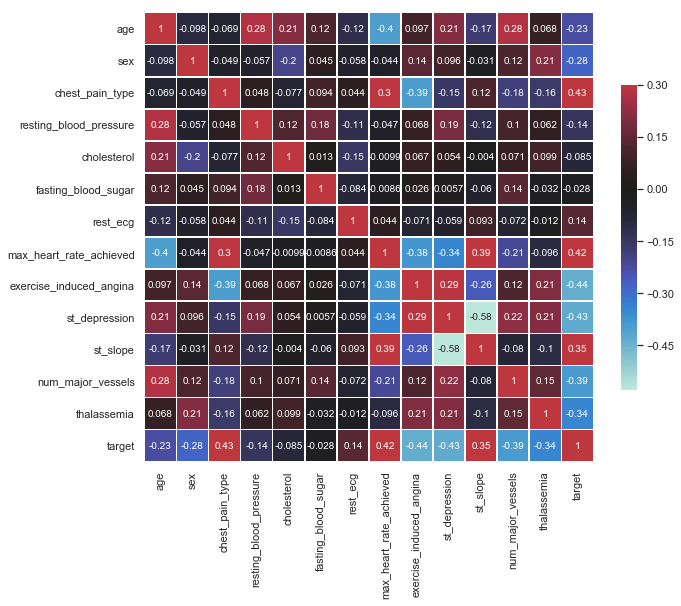

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(), vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
plt.tight_layout()
plt.show()

<Figure size 360x360 with 0 Axes>

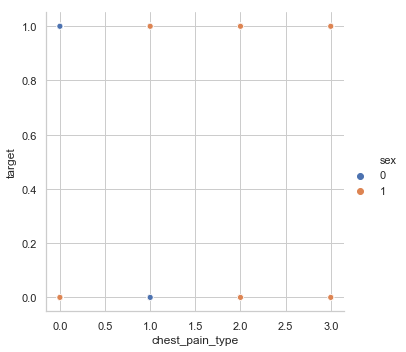

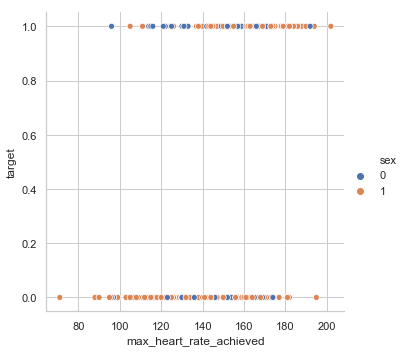

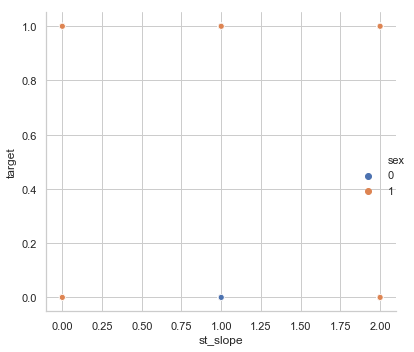

In [10]:
plt.figure(figsize=(5,5))
for x in ['chest_pain_type', 'max_heart_rate_achieved', 'st_slope']:
    sns.relplot(x=x, y='target', data=ds, hue='sex')
plt.tight_layout()
plt.show()

In [109]:
## Categorical to Dummy

# Modifico i valori in modo da identificare con chiarezza le
# feature categoriche
ds['sex'][ds['sex'] == 0] = 'female'
ds['sex'][ds['sex'] == 1] = 'male'

ds['chest_pain_type'][ds['chest_pain_type'] == 1] = 'typical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 2] = 'atypical angina'
ds['chest_pain_type'][ds['chest_pain_type'] == 3] = 'non-anginal pain'
ds['chest_pain_type'][ds['chest_pain_type'] == 4] = 'asymptomatic'

ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
ds['fasting_blood_sugar'][ds['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

ds['rest_ecg'][ds['rest_ecg'] == 0] = 'normal'
ds['rest_ecg'][ds['rest_ecg'] == 1] = 'ST-T wave abnormality'
ds['rest_ecg'][ds['rest_ecg'] == 2] = 'left ventricular hypertrophy'

ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 0] = 'no'
ds['exercise_induced_angina'][ds['exercise_induced_angina'] == 1] = 'yes'

ds['st_slope'][ds['st_slope'] == 1] = 'upsloping'
ds['st_slope'][ds['st_slope'] == 2] = 'flat'
ds['st_slope'][ds['st_slope'] == 3] = 'downsloping'

ds['thalassemia'][ds['thalassemia'] == 1] = 'normal'
ds['thalassemia'][ds['thalassemia'] == 2] = 'fixed defect'
ds['thalassemia'][ds['thalassemia'] == 3] = 'reversable defect'


# Converto i tipi in modo corretto

ds['sex'] = ds['sex'].astype('object')
ds['chest_pain_type'] = ds['chest_pain_type'].astype('object')
ds['fasting_blood_sugar'] = ds['fasting_blood_sugar'].astype('object')
ds['rest_ecg'] = ds['rest_ecg'].astype('object')
ds['exercise_induced_angina'] = ds['exercise_induced_angina'].astype('object')
ds['st_slope'] = ds['st_slope'].astype('object')
ds['thalassemia'] = ds['thalassemia'].astype('object')

# Genero le dummy features
ds = pd.get_dummies(ds, drop_first=True)

In [129]:
corr = ds.corr()
corr = corr['target']
corr.drop(index='target', inplace=True)
corr.sort_values(ascending=False, inplace=True)
corr[corr > 0]

thalassemia_fixed defect                   0.527334
max_heart_rate_achieved                    0.421741
st_slope_flat                              0.394066
chest_pain_type_atypical angina            0.316742
chest_pain_type_typical angina             0.245879
chest_pain_type_non-anginal pain           0.086957
fasting_blood_sugar_lower than 120mg/ml    0.028046
Name: target, dtype: float64

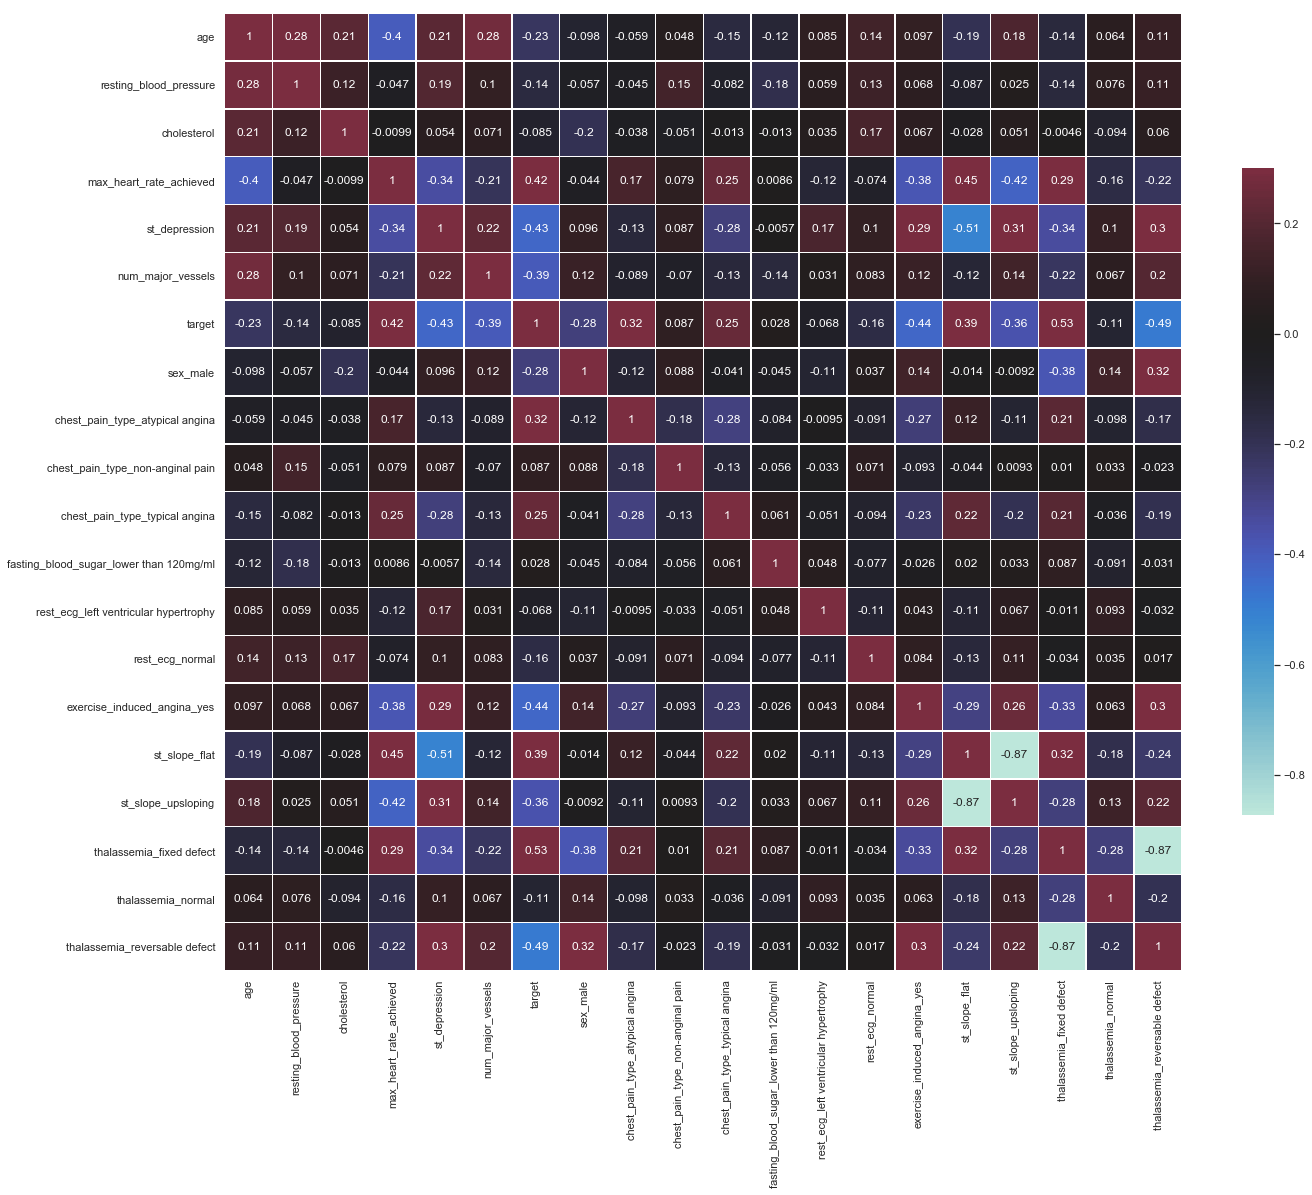

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(), vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={'shrink': .5}, annot=True)
plt.tight_layout()
plt.show()

In [15]:
X = ds.drop(['target'], axis=1) # X -> data
Y = ds['target'] # Y -> values to predict

In [ ]:
X.describe()

In [16]:
## Normalization
scaler = preprocessing.StandardScaler()
columns_names = X.columns
# Fit your data on the scaler object
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns_names)


C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AlessioGilardi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=0)

In [99]:
svm = SVC(random_state = 10, gamma='scale', kernel='linear')
svm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,Y_test)*100))

Test Accuracy of SVM Algorithm: 85.25%


In [86]:
Y_pred = svm.predict(X_test)

In [38]:
Y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [50]:
np.vstack((Y_pred, Y_test.values))

array([[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [78]:
100*(1-sum((Y_test.values - Y_pred)**2)/len(Y_test.values))

86.88524590163934

In [104]:
svm.coef_.ravel()

array([ 5.27557920e-02, -2.41960725e-01, -2.97106326e-02,  4.28272823e-01,
       -3.34703801e-01, -6.64404140e-01, -4.54988880e-01,  4.24821665e-01,
        3.62539577e-01,  4.33496713e-02, -1.44205852e-01,  5.13478149e-16,
       -6.77511570e-02, -2.41098093e-01, -2.60577280e-02, -3.20179767e-01,
        6.49216905e-01,  6.76050504e-02,  7.20404081e-02])

In [101]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

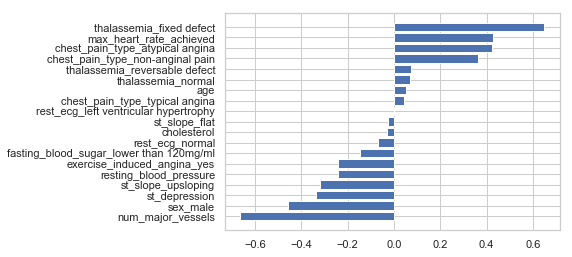

In [106]:
f_importances(svm.coef_.ravel(), X_test.columns)

In [ ]:
thalassemia_fixed defect                   0.527334
max_heart_rate_achieved                    0.421741
st_slope_flat                              0.394066
chest_pain_type_atypical angina            0.316742
chest_pain_type_typical angina             0.245879
chest_pain_type_non-anginal pain           0.086957
fasting_blood_sugar_lower than 120mg/ml    0.028046